In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (탐색적 데이터 분석)
* 데이터 특성, 분포, 변환
* 수치형 데이터, 범주형 데이터를 따로 분석

In [103]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [104]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [105]:
data = data.drop('Cabin', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,age_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20s,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30s,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20s,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30s,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30s,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,20s,20s
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,10s,10s
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,None,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,20s,20s


In [106]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
age_cat        177
age_cat2       177
dtype: int64

# 범주형 데이터와 수치형 데이터 분리

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
categorical_1 = data[['Name', 'Sex', 'Ticket', 'Embarked']]
numerical_1 = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]

In [13]:
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,644


In [107]:
for cat_cols in categorical_1:
    print(cat_cols)
    print(data[cat_cols].value_counts())
    print()

Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

Sex
Sex
male      577
female    314
Name: count, dtype: int64

Ticket
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Le

In [ ]:
numerical_1.describe()

In [19]:
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,644


dtype을 출력해서 조건문으로 범주형과 수치형 자료를 분리

In [26]:
categorical_2_cols = []
numerical_2_cols = []
for col in data:
    if data[col].dtype == 'object':
        categorical_2_cols.append(col)
    else:
        numerical_2_cols.append(col)
print(categorical_2_cols)
print(numerical_2_cols)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [28]:
data[categorical_2_cols]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [30]:
data[numerical_2_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


select_dtypes()를 이용한 범주형, 수치형 변수 구분하기

In [36]:
cate_cols = data.select_dtypes(include=['object'])

In [37]:
num_cols = data.select_dtypes(exclude=['object'])

<Axes: xlabel='Embarked'>

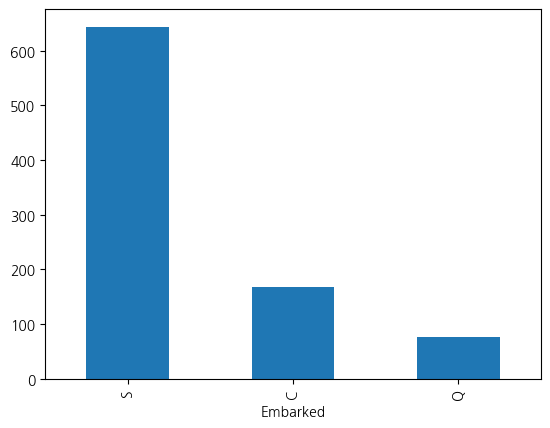

In [108]:
cate_cols['Embarked'].value_counts().plot(kind='bar')

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64


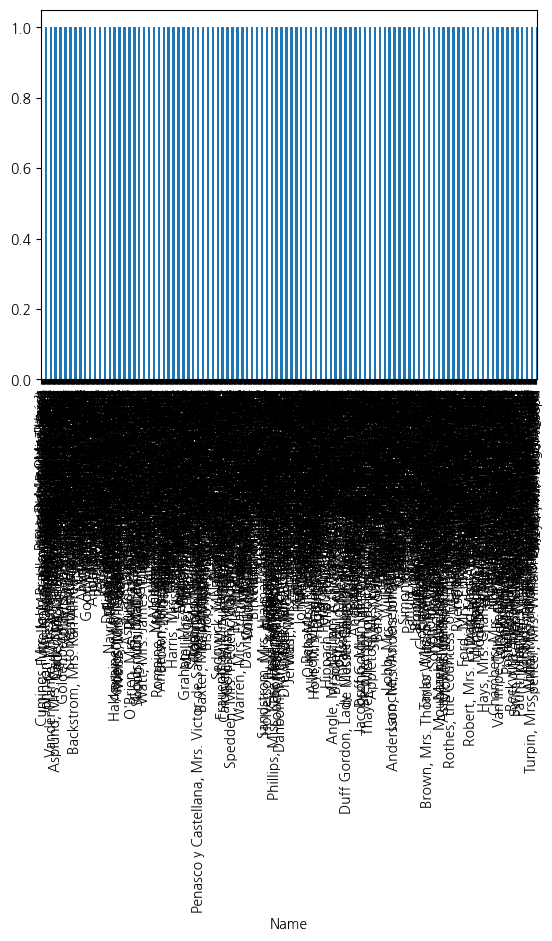

Sex
male      577
female    314
Name: count, dtype: int64


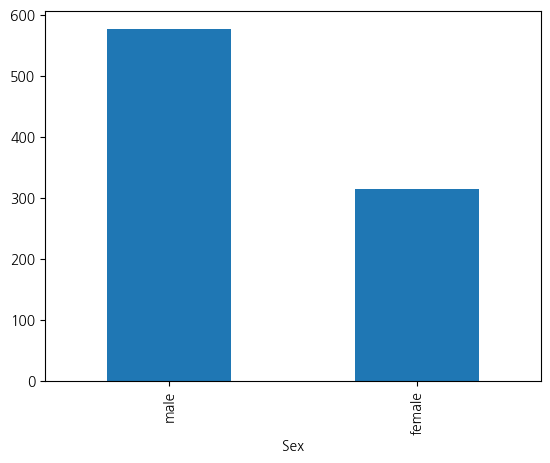

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: int64


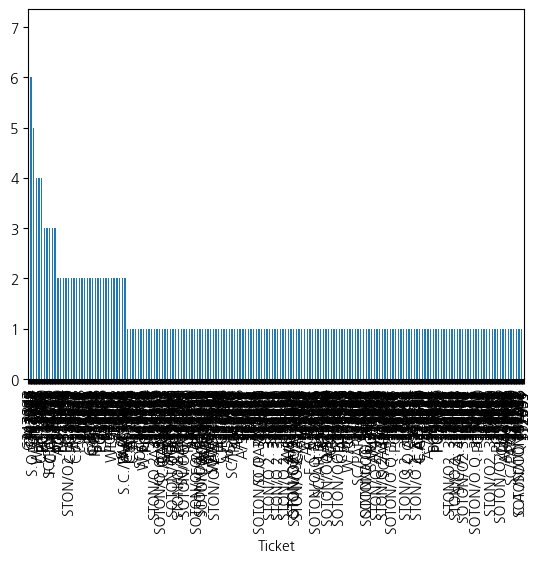

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


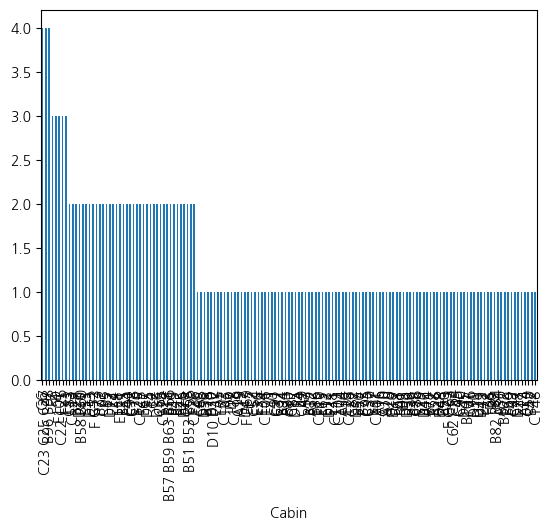

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


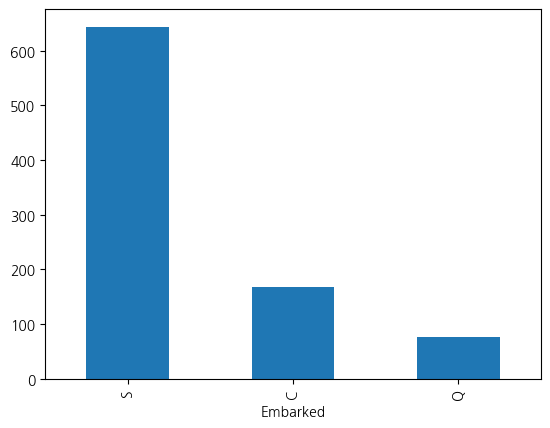

In [109]:
for col in cate_cols:
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()

In [38]:
cate_cols

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [39]:
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [110]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,age_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,20s,20s


In [112]:
data['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [113]:
data['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [43]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

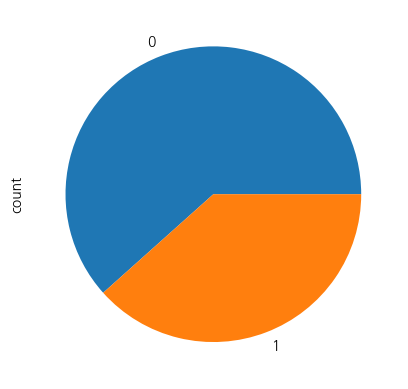

In [115]:
data['Survived'].value_counts().plot(kind='pie')

In [116]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived'>

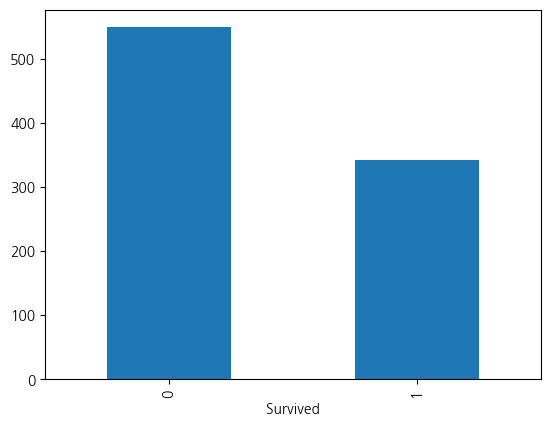

In [117]:
data['Survived'].value_counts().plot(kind='bar')

In [119]:
data['Name'].nunique()

891

In [121]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [123]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

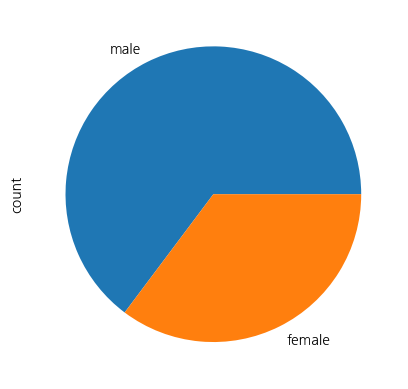

In [125]:
data['Sex'].value_counts().plot(kind='pie')

In [127]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [129]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [133]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [134]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

<Axes: ylabel='Frequency'>

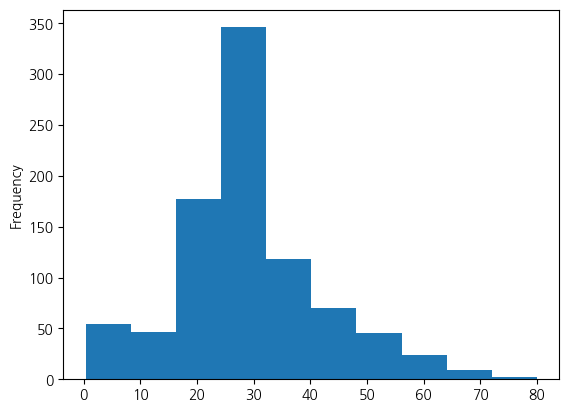

In [132]:
data['Age'].plot(kind='hist')

In [51]:
data['Pclass'].value_counts(sort=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

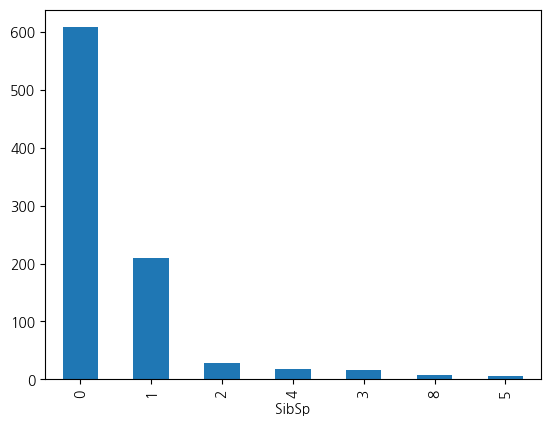

In [54]:
data['SibSp'].value_counts().plot(kind='bar')

In [55]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

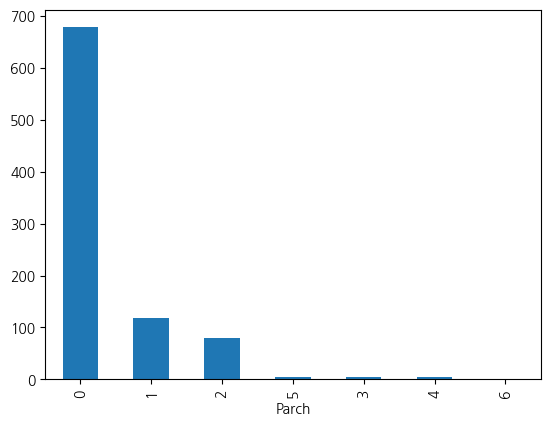

In [57]:
data['Parch'].value_counts().plot(kind='bar')

In [59]:
data['Ticket'].value_counts()

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091             1
Name: count, Length: 681, dtype: int64

In [62]:
pc_fare_desc = data[['Pclass', 'Fare']].groupby('Pclass').describe()

In [64]:
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [70]:
pc1_max = pc_fare_desc.loc[1, ('Fare', '75%')] + (1.5 * pc_fare_desc.loc[1, ('Fare', '75%')] - pc_fare_desc.loc[1, ('Fare', '25%')] )

In [72]:
pc1_max = pc_fare_desc.loc[1, ('Fare', '75%')] + (1.5 * pc_fare_desc.loc[1, ('Fare', '75%')] - pc_fare_desc.loc[1, ('Fare', '25%')] )
pc2_max = pc_fare_desc.loc[2, ('Fare', '75%')] + (1.5 * pc_fare_desc.loc[2, ('Fare', '75%')] - pc_fare_desc.loc[2, ('Fare', '25%')] )
pc2_max = pc_fare_desc.loc[2, ('Fare', '75%')] + (1.5 * pc_fare_desc.loc[3, ('Fare', '75%')] - pc_fare_desc.loc[3, ('Fare', '25%')] )

In [76]:
data[(data['Pclass'] == 1 ) & (data['Fare'] > pc1_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [136]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [138]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

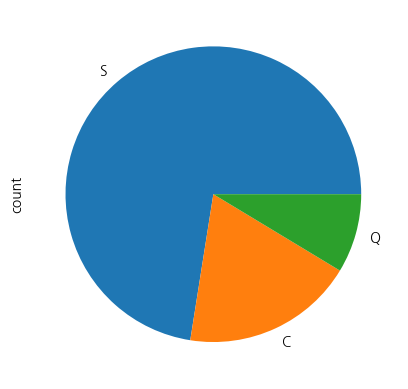

In [139]:
data['Embarked'].value_counts().plot(kind='pie')

# 종속 변수 (Survived)와 독립변수 (Survived를 제외한 나머지) 관계 파악하기

In [77]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Pclass는 생존율에 영향을 미침 -> 1이면 높고 3이면 낮다

In [79]:
data[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [82]:
data[['Name', 'Survived']].groupby("Name").mean()

,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0


In [85]:
# 성별별 생존율: 여자가 남자보다 생존율이 높다
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [87]:
data[['Age', 'Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


* 나이를 구간화해서 생존율과의 관계 파악
    * 10, 20, 30, 40, 50
    * 0 - 10 under10s
    * 10 - 19 10s
    * 20 - 29 20s

In [89]:
def age_cat(x):
    if x < 10:
        return "under10s"
    elif 10 <= x < 20:
        return "10s"
    elif 10 <= x < 30:
        return "20s"
    elif 10 <= x < 40:
        return "30s"
    elif 10 <= x < 50:
        return "40s"
    elif 10 <= x < 60:
        return "50s"
    elif 10 <= x < 70:
        return "60s"
    elif 10 <= x < 80:
        return "70s"
    elif 10 <= x < 90:
        return "80s"

In [93]:
data['age_cat'] = data['Age'].apply(age_cat)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s


In [140]:
data['age_cat'].value_counts()

age_cat
20s         220
30s         167
10s         102
40s          89
under10s     62
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64

연령대별 생존율 구하기

In [142]:
data[['age_cat', 'Survived']].groupby('age_cat').mean().sort_values(by="Survived", ascending=False)

,Survived
age_cat,
80s,1.000000
under10s,0.612903
30s,0.437126
50s,0.416667
10s,0.401961
40s,0.382022
20s,0.350000
60s,0.315789
70s,0.000000


In [144]:
data[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [145]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

In [147]:
data[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [149]:
data[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by="Survived", ascending=False)

,Survived
Ticket,
111361,1.0
112053,1.0
330923,1.0
330931,1.0
330932,1.0
...,...
113043,0.0
113050,0.0
113051,0.0


In [150]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [151]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


* pclass, sex, age_cat

In [99]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [100]:
data[['Pclass', 'Sex', 'Survived', 'age_cat']].groupby(['Pclass', 'Sex', 'age_cat']).mean()

Survived
Pclass Sex    age_cat           
1      female 10s       1.000000
              20s       0.937500
              30s       1.000000
              40s       1.000000
              50s       0.916667
              60s       1.000000
              under10s  0.000000
       male   10s       0.400000
              20s       0.500000
              30s       0.521739
              40s       0.375000
              50s       0.266667
              60s       0.100000
              70s       0.000000
              80s       1.000000
              under10s  1.000000
2      female 10s       1.000000
              20s       0.880000
              30s       0.941176
              40s       0.900000
              50s       0.833333
              under10s  1.000000
       male   10s       0.100000
              20s       0.000000
              30s       0.096774
              40s       0.125000
              50s       0.000000
              60s       0.333333
              70s       0.000000
              under10s  1.000000
3      female 10s       0.541667
              20s       0.483871
              30s       0.437500
              40s       0.000000
              60s       1.000000
              under10s  0.523810
       male   10s       0.095238
              20s       0.156863
              30s       0.150943
              40s       0.080000
              50s       0.000000
              60s       0.000000
              70s       0.000000
              under10s  0.380952

* 데이터의 구간화를 쉽게 해주는 함수 cut
* pd.cut(data['Age'], bins=[구간], labels['구간의 이름'])

In [101]:
data['age_cat2'] = pd.cut(data['Age'], 
       bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])


In [102]:
data[['age_cat', 'age_cat2']]

,age_cat,age_cat2
0,20s,20s
1,30s,30s
2,20s,20s
3,30s,30s
4,30s,30s
...,...,...
886,20s,20s
887,10s,10s
888,None,NaN
889,20s,20s


# 변수들 간의 상관관계 보기 .corr()
* .corr()
* -1, 0, 1
* -1 : 음의 상관관계 (반비례 관계, 집과 역의 거리가 멀면 집값이 떨어진다)
* 0: 관계 없음
* 1 : 양의 상관관계 (정비례 관계, 날씨가 더워지면 아이스크림 판매량이 높아진다)

In [152]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

In [154]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


# 데이터 전처리를 안 하고 알고리즘에 넣었을 때 생기는 일

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [7]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [10]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
714,715,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
532,533,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
132,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
579,580,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
537,538,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
196,197,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q


In [11]:
# #머신러닝 알고리즘 의사결정나무 호출

# dct = DecisionTreeClassifier()
# dct.fit(X_train, y_train) #훈련데이터 제공.. 학습 결과 dct에 저장
# pred = dct.predict(X_test) 
# print(y_test, pred)

ValueError: could not convert string to float: 'Andersen-Jensen, Miss. Carla Christine Nielsine'

# Feature Engineering
* 필요없는 변수 삭제
* 필요한 변수만 선택
* 새로운 변수 생성 (파생변수)
* 카테고리 변수에 대한 label encoding, one-hot encoding

# 문자로 되어 있는 범주형 자료를 숫자로 변환하기


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [21]:
df = df.drop(['Ticket'], axis=1)

KeyError: "['Ticket'] not found in axis"

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [24]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [25]:
# 파생변수 생성하기 형제자매 컬럼과 부모자식 컬럼을 합쳐서 가족 컬럼 생성
df['Family'] = df['SibSp'] + df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [27]:
df = df.drop(['SibSp', 'Parch'],axis=1)

# 문자로 되어 있는 범주형 자료를 숫자로 변환하기
* 조건문을 이용해서 숫자로 변환하기 - 서열이 생김
* label encoding을 이용해서 변환하기 - 나중에 숫자에서 문자로 복원 가능 - 서열이 남음
* one-hot encoding unique value의 개수만큼 새로운 컬럼을 만들어서 0/1 구분 벡터, 서열이 사라지고 평등해짐
* male 1/0, female 1/0

* 반복문과 조건문을 이용해서 바꾸기

In [31]:
result = []
for i in df['Sex']:
    if i == 'male':
        result.append(0)
    else:
        result.append(1)
df['Sex2'] = result

In [32]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex2
0,0,3,male,22.000000,7.2500,S,1,0
1,1,1,female,38.000000,71.2833,C,1,1
2,1,3,female,26.000000,7.9250,S,0,1
3,1,1,female,35.000000,53.1000,S,1,1
4,0,3,male,35.000000,8.0500,S,0,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,0
887,1,1,female,19.000000,30.0000,S,0,1
888,0,3,female,29.699118,23.4500,S,3,1
889,1,1,male,26.000000,30.0000,C,0,0


* .str.replace를 이용해 

In [40]:
df['Sex3'] = df['Sex'].str.replace("female", "1").str.replace("male", "0")
df['Sex3'] = df['Sex3'].astype(int)
df['Sex3'].dtype

dtype('int64')

In [30]:
df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

label encoder를 이용해서 변경하는 방법

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
sex_le = le.fit_transform(df['Sex'])
sex_le

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [43]:
df['sex_le'] = sex_le
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex2,Sex3,sex_le
0,0,3,male,22.000000,7.2500,S,1,0,0,1
1,1,1,female,38.000000,71.2833,C,1,1,1,0
2,1,3,female,26.000000,7.9250,S,0,1,1,0
3,1,1,female,35.000000,53.1000,S,1,1,1,0
4,0,3,male,35.000000,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,0,0,1
887,1,1,female,19.000000,30.0000,S,0,1,1,0
888,0,3,female,29.699118,23.4500,S,3,1,1,0
889,1,1,male,26.000000,30.0000,C,0,0,0,1


In [44]:
le.inverse_transform(sex_le)

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [28]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


* one - hot enciding
* value의 개수만큼 새로운 컬럼(변수)을 만들어서 0/1로 표시
* 자료의 서열이 사라짐
* => 더미변수 만들기, get dummies()
* value가 너무 많으면 변수의 수가 너무 많이 증가하는 문제가 발생함
* 변수가 너무 많이 늘어나면 **다중공선성** 문제 발생
* get_dummies(df, drop_first=True)

In [49]:
df2 = pd.get_dummies(df, columns=['Sex', 'Family', 'Embarked'], drop_first=True)
# True -> 남자
# False -> 여자

In [50]:
df2

,Survived,Pclass,Age,Fare,Sex2,Sex3,sex_le,Sex_male,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,0,0,1,True,True,False,False,False,False,False,False,False,False,True
1,1,1,38.000000,71.2833,1,1,0,False,True,False,False,False,False,False,False,False,False,False
2,1,3,26.000000,7.9250,1,1,0,False,False,False,False,False,False,False,False,False,False,True
3,1,1,35.000000,53.1000,1,1,0,False,True,False,False,False,False,False,False,False,False,True
4,0,3,35.000000,8.0500,0,0,1,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,0,1,True,False,False,False,False,False,False,False,False,False,True
887,1,1,19.000000,30.0000,1,1,0,False,False,False,False,False,False,False,False,False,False,True
888,0,3,29.699118,23.4500,1,1,0,False,False,False,True,False,False,False,False,False,False,True
889,1,1,26.000000,30.0000,0,0,1,True,False,False,False,False,False,False,False,False,False,False


In [51]:
X = df2.drop(['Survived', 'Fare', 'Sex2', 'Sex3', 'sex_le'], axis=1)

In [52]:
X

,Pclass,Age,Sex_male,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10,Embarked_Q,Embarked_S
0,3,22.000000,True,True,False,False,False,False,False,False,False,False,True
1,1,38.000000,False,True,False,False,False,False,False,False,False,False,False
2,3,26.000000,False,False,False,False,False,False,False,False,False,False,True
3,1,35.000000,False,True,False,False,False,False,False,False,False,False,True
4,3,35.000000,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,True,False,False,False,False,False,False,False,False,False,True
887,1,19.000000,False,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,False,False,False,True,False,False,False,False,False,False,True
889,1,26.000000,True,False,False,False,False,False,False,False,False,False,False


In [54]:
y = df2['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [82]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(x_test)
print(y_test, pred)


590    0
131    0
628    0
195    1
230    1
      ..
318    1
863    0
254    0
396    0
358    1
Name: Survived, Length: 268, dtype: int64 [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 0 1 1]


In [85]:
# 모델 추가 및 변경 가능

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [86]:
dtc= DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)

pred = dtc.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.76      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [87]:
# 랜덤포레스트 
rfc= RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

pred = rfc.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7910447761194029
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       174
           1       0.69      0.74      0.71        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



In [88]:
# 로지스틱회귀 불러오기
from sklearn.linear_model import LogisticRegression

In [89]:
lr= LogisticRegression(random_state=10)
lr.fit(X_train, y_train)

pred = lr.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.832089552238806
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       174
           1       0.76      0.76      0.76        94

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



C:\Users\vbak0\miniforge3\envs\fintech\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 모델의 성능 테스트

In [66]:
from sklearn.metrics import accuracy_score, classification_report

In [67]:
print(accuracy_score(y_test, pred))

0.8022388059701493


In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.70      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [72]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex2,Sex3,sex_le
0,0,3,male,22.000000,7.2500,S,1,0,0,1
1,1,1,female,38.000000,71.2833,C,1,1,1,0
2,1,3,female,26.000000,7.9250,S,0,1,1,0
3,1,1,female,35.000000,53.1000,S,1,1,1,0
4,0,3,male,35.000000,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,0,0,1
887,1,1,female,19.000000,30.0000,S,0,1,1,0
888,0,3,female,29.699118,23.4500,S,3,1,1,0
889,1,1,male,26.000000,30.0000,C,0,0,0,1


# 상관관계 분석 .corr()
* 변수들 간의 상관관계를 분석
* 1이면 강한 양의 상관관계 정비례 
* -1이면 강한 음의 상관관계 반비례
* 0이면 관계가 없음
* 0.5, -0.5 나온다면 고민해야 함
* 0.7 or -0.7 이상이면 두 변수 중 한 개만 선택
* method = 'peasron' : 숫자형 데이터들 간의 상관관계 분석
* method = 'spearman' : 범주형 데이터가 섞여 있는 데이터셋의 경우 스피어만으로 상관관계 분석

In [74]:
df2.corr(method="spearman")

,Survived,Pclass,Age,Fare,Sex2,Sex3,sex_le,Sex_male,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10,Embarked_Q,Embarked_S
Survived,1.000000,-0.339668,-0.039109,0.323736,0.543351,0.543351,-0.543351,-0.543351,0.163157,0.143869,0.128347,-0.049466,-0.080968,-0.012134,-0.064988,-0.070234,0.003650,-0.149683
Pclass,-0.339668,1.000000,-0.308875,-0.688032,-0.135775,-0.135775,0.135775,0.135775,-0.213005,-0.045123,-0.064223,0.059840,0.059766,0.100973,0.071156,0.076901,0.229763,0.049011
Age,-0.039109,-0.308875,1.000000,0.118847,-0.067809,-0.067809,0.067809,0.067809,0.048100,-0.063163,-0.118640,-0.068436,-0.125683,-0.104092,-0.086172,0.009379,0.002690,-0.023040
Fare,0.323736,-0.688032,0.118847,1.000000,0.259593,0.259593,-0.259593,-0.259593,0.283435,0.187958,0.153798,0.093106,0.156431,0.087296,0.088855,0.116618,-0.232149,-0.032712
Sex2,0.543351,-0.135775,-0.067809,0.259593,1.000000,1.000000,-1.000000,-1.000000,0.184774,0.096322,0.116243,0.122602,0.003738,0.076860,-0.003289,0.014186,0.074115,-0.119224
Sex3,0.543351,-0.135775,-0.067809,0.259593,1.000000,1.000000,-1.000000,-1.000000,0.184774,0.096322,0.116243,0.122602,0.003738,0.076860,-0.003289,0.014186,0.074115,-0.119224
sex_le,-0.543351,0.135775,0.067809,-0.259593,-1.000000,-1.000000,1.000000,1.000000,-0.184774,-0.096322,-0.116243,-0.122602,-0.003738,-0.076860,0.003289,-0.014186,-0.074115,0.119224
Sex_male,-0.543351,0.135775,0.067809,-0.259593,-1.000000,-1.000000,1.000000,1.000000,-0.184774,-0.096322,-0.116243,-0.122602,-0.003738,-0.076860,0.003289,-0.014186,-0.074115,0.119224
Family_1,0.163157,-0.213005,0.048100,0.283435,0.184774,0.184774,-0.184774,-0.184774,1.000000,-0.168855,-0.086138,-0.061453,-0.074723,-0.054872,-0.038668,-0.041790,-0.051009,-0.102759
Family_2,0.143869,-0.045123,-0.063163,0.187958,0.096322,0.096322,-0.096322,-0.096322,-0.168855,1.000000,-0.065949,-0.047050,-0.057209,-0.042010,-0.029605,-0.031995,-0.035313,-0.007523


* 상관관계를 보여주는 그래프 : heatmap

In [80]:
import seaborn as sns

In [81]:
# annot 옵션 추가시 숫자가 같이 표시됨

plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(method="spearman"), annot=True, linewidth=0.5)

NameError: name 'plt' is not defined